In [1]:
import pandas as pd
import numpy as np

### Step 1: Importing Data

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144035,-0.795465,1.035145,0.629094,1.060550,0.185512,0.442982,0.367739,0.629104,-0.215407,...,-0.224165,-0.406332,-0.113468,-0.519506,0.062945,-0.625920,0.305893,0.130054,35.80,0
1,57027,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
2,75347,1.485941,-0.325035,-0.551499,-0.845371,-0.216371,-0.917921,-0.011792,-0.375973,-1.136155,...,0.145207,0.346199,-0.281322,-0.404634,0.909394,-0.034868,-0.030328,-0.004064,25.00,0
3,75424,-0.804963,0.712653,1.360827,-0.332024,1.302313,1.623387,0.551873,0.637665,-0.844825,...,0.219177,0.644723,-0.258438,-1.357390,0.469040,-0.272856,0.023010,-0.053357,18.95,0
4,102676,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1


### Step 2: Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 31 columns):
Time      902 non-null int64
V1        902 non-null float64
V2        902 non-null float64
V3        902 non-null float64
V4        901 non-null float64
V5        901 non-null float64
V6        901 non-null float64
V7        901 non-null float64
V8        901 non-null float64
V9        902 non-null float64
V10       902 non-null float64
V11       902 non-null float64
V12       902 non-null float64
V13       902 non-null float64
V14       901 non-null float64
V15       901 non-null float64
V16       901 non-null float64
V17       901 non-null float64
V18       901 non-null float64
V19       901 non-null float64
V20       902 non-null float64
V21       902 non-null float64
V22       902 non-null float64
V23       902 non-null float64
V24       902 non-null float64
V25       902 non-null float64
V26       902 non-null float64
V27       902 non-null float64
V28       902 non-null float6

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df[df['V4'].isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
900,11131,-1.426623,4.141986,-9.804103,NaN,NaN,NaN,NaN,NaN,-3.249516,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.50204,1.977258,0.711607,1.0,1


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().values.any()

False

### Step 3: Data Preprocessing

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,89579.985556,-2.302370,1.776772,-3.533859,2.210778,-1.613497,-0.699977,-2.703860,0.381013,-1.270022,...,0.366111,-0.005000,-0.031945,-0.038475,0.030377,0.025562,0.077531,0.036373,108.953633,0.500000
std,48739.857474,5.546627,3.672593,6.171931,3.174811,4.342731,1.890163,5.877914,4.853342,2.297901,...,2.702693,1.139523,1.196382,0.573055,0.661572,0.468758,0.989314,0.421468,308.928972,0.500278
min,406.000000,-30.552380,-8.402154,-31.103685,-4.401290,-29.730600,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.149923,-7.263482,-1.869290,0.000000,0.000000
25%,47249.750000,-2.825991,-0.195431,-5.068730,-0.105275,-1.775001,-1.587624,-2.992775,-0.178557,-2.301580,...,-0.162558,-0.543180,-0.226998,-0.379574,-0.301918,-0.295559,-0.059425,-0.053411,1.625000,0.000000
50%,81674.500000,-0.712196,0.896925,-1.456225,1.206713,-0.458894,-0.672049,-0.602134,0.150282,-0.680745,...,0.130469,-0.017277,-0.025929,0.016212,0.049648,-0.026232,0.046411,0.027474,18.970000,0.500000
75%,138944.250000,1.138937,2.777569,0.366721,4.173330,0.529846,0.035199,0.266629,0.944850,0.213191,...,0.651412,0.570253,0.194164,0.382373,0.393059,0.350455,0.419129,0.206210,99.990000,1.000000
max,172622.000000,2.369906,22.057729,3.225532,12.114672,11.095089,21.307738,31.527244,20.007208,4.762324,...,27.202839,8.361985,5.466230,3.569702,2.208209,1.884741,4.655054,3.503999,6454.740000,1.000000


In [11]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450
1,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450


In [12]:
X_df = df.drop(columns=['Class'])
y_df = df['Class']

In [13]:
X_df.shape, y_df.shape

((900, 30), (900,))

In [14]:
X = np.array(X_df)
y = np.array(y_df)

In [15]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
y = onehot.fit_transform(y.reshape(y.shape[0], 1))
y.shape

(900, 2)

### Step 4: Scaling the parameters so that they are on same scale

In [16]:
# #optional step
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

### Step 5: Modelling Data

In [17]:
import tensorflow as tf

In [18]:
def model_keras(x):
    model_k = tf.keras.models.Sequential()
    model_k.add(tf.keras.layers.BatchNormalization(input_shape=(30,)))
    model_k.add(tf.keras.layers.Dense(1000, activation='relu'))
    model_k.add(tf.keras.layers.Dropout(0.5))

    model_k.add(tf.keras.layers.BatchNormalization())
    model_k.add(tf.keras.layers.Dense(500, activation='relu'))
    model_k.add(tf.keras.layers.BatchNormalization())
    model_k.add(tf.keras.layers.Dropout(0.2))

    model_k.add(tf.keras.layers.Dense(50, activation='relu'))
    model_k.add(tf.keras.layers.BatchNormalization())
    model_k.add(tf.keras.layers.Dropout(0.2))

    model_k.add(tf.keras.layers.Dense(2))
    model_k.add(tf.keras.layers.Activation('sigmoid'))
    model_k.compile(tf.keras.optimizers.Adam(lr=0.0001) , loss = 'binary_crossentropy', metrics=['accuracy'])
    return model_k

In [19]:
model_keras = model_keras(X)

In [20]:
model_keras.fit(X, y, epochs=30, verbose =1, validation_split = 0.1)

Train on 810 samples, validate on 90 samples
Epoch 1/30
810/810 [==============================] - 14s 18ms/step - loss: 0.6398 - acc: 0.6759 - val_loss: 0.6612 - val_acc: 0.7389
Epoch 2/30
810/810 [==============================] - 1s 661us/step - loss: 0.3535 - acc: 0.8630 - val_loss: 0.6293 - val_acc: 0.6111
Epoch 3/30
810/810 [==============================] - 1s 704us/step - loss: 0.3187 - acc: 0.8802 - val_loss: 0.6000 - val_acc: 0.5556
Epoch 4/30
810/810 [==============================] - 1s 744us/step - loss: 0.2925 - acc: 0.8864 - val_loss: 0.5651 - val_acc: 0.5611
Epoch 5/30
810/810 [==============================] - 1s 747us/step - loss: 0.2642 - acc: 0.8981 - val_loss: 0.5321 - val_acc: 0.5667
Epoch 6/30
810/810 [==============================] - 1s 706us/step - loss: 0.2419 - acc: 0.9056 - val_loss: 0.4867 - val_acc: 0.6333
Epoch 7/30
810/810 [==============================] - 1s 724us/step - loss: 0.2371 - acc: 0.9148 - val_loss: 0.4419 - val_acc: 0.7444
Epoch 8/30
810/81

## Without Dropouts

In [21]:
def model_without_dropout(x):
    model_k = tf.keras.models.Sequential()
    model_k.add(tf.keras.layers.BatchNormalization(input_shape=(30,)))
    model_k.add(tf.keras.layers.Dense(1000, activation='relu'))
    #model_k.add(tf.keras.layers.Dropout(0.2))

    model_k.add(tf.keras.layers.BatchNormalization())
    model_k.add(tf.keras.layers.Dense(500, activation='relu'))
    model_k.add(tf.keras.layers.BatchNormalization())

    model_k.add(tf.keras.layers.Dense(50, activation='relu'))
    model_k.add(tf.keras.layers.BatchNormalization())

    model_k.add(tf.keras.layers.Dense(2))
    model_k.add(tf.keras.layers.Activation('sigmoid'))
    model_k.compile(tf.keras.optimizers.Adam(lr=0.001) , loss = 'binary_crossentropy', metrics=['accuracy'])
    return model_k

In [22]:
model_without_dropout = model_without_dropout(X)

In [23]:
model_without_dropout.fit(X, y, validation_split=0.1, epochs= 30, verbose =1 )

Train on 810 samples, validate on 90 samples
Epoch 1/30
810/810 [==============================] - 3s 4ms/step - loss: 0.2652 - acc: 0.8938 - val_loss: 0.5811 - val_acc: 0.7611
Epoch 2/30
810/810 [==============================] - 1s 672us/step - loss: 0.1667 - acc: 0.9346 - val_loss: 0.5522 - val_acc: 0.7444
Epoch 3/30
810/810 [==============================] - 1s 729us/step - loss: 0.1329 - acc: 0.9519 - val_loss: 0.5553 - val_acc: 0.6889
Epoch 4/30
810/810 [==============================] - 1s 703us/step - loss: 0.1189 - acc: 0.9586 - val_loss: 0.5486 - val_acc: 0.6556
Epoch 5/30
810/810 [==============================] - 1s 680us/step - loss: 0.1051 - acc: 0.9673 - val_loss: 0.5168 - val_acc: 0.6889
Epoch 6/30
810/810 [==============================] - 1s 694us/step - loss: 0.0894 - acc: 0.9685 - val_loss: 0.4845 - val_acc: 0.6611
Epoch 7/30
810/810 [==============================] - 1s 721us/step - loss: 0.0822 - acc: 0.9741 - val_loss: 0.3645 - val_acc: 0.9000
Epoch 8/30
810/810 

In [24]:
val_loss = model_keras.history.history['val_loss']
tra_loss = model_keras.history.history['loss']

val_acc = model_keras.history.history['val_acc']
tra_acc = model_keras.history.history['acc']

## Step 6: Analyzing the loss/accuracy curve

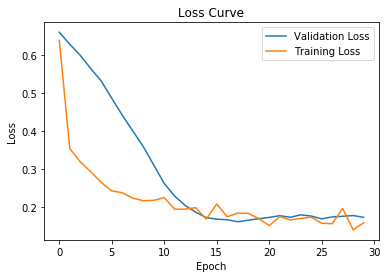

In [26]:
import matplotlib.pyplot as plt
plt.plot(val_loss)
plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

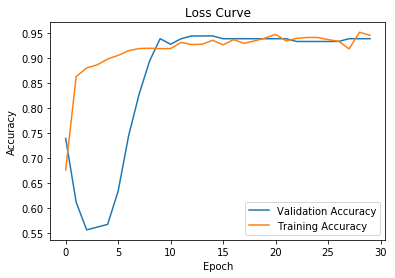

In [27]:
import matplotlib.pyplot as plt
plt.plot(val_acc)
plt.plot(tra_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.show()

## Step 7: Testing Our Neural Network on Test Set

In [ ]:
test_df = pd.read_csv('./test.csv')
test_df.head()
y_test = np.array(test_df['Class'])
x_test =  np.array(test_df.drop(columns='Class'))
x_test.shape, y_test.shape

In [ ]:
X_test = MinMaxScaler().fit_transform(x_test)

In [ ]:
y_test[0:10]

In [ ]:
y_test = OneHotEncoder(sparse=False).fit_transform(y_test.reshape(y_test.shape[0] , 1))

## Step 8: Predicting our model on Test Set

In [ ]:
y_pred = model_keras.predict(X_test)

### Step 9: Evaluating our model Based on F1 Score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(y_pred,1)
y_actual = np.argmax(y_test,1)

print(classification_report(y_actual, y_pred))


In [ ]:

print(confusion_matrix(y_actual,y_pred))